---
## Decision Trees
#### Language: Python 3.8.8
#### Author: Tianjian Sun
---
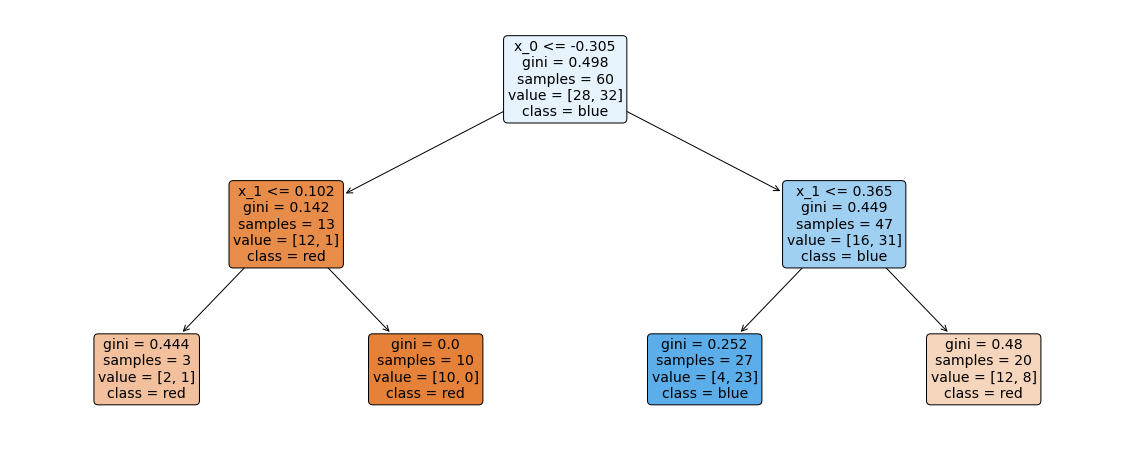

### Table of Contents
- [Introduction](#Introduction)
- [Algorithm](#Algorithm)
    - [Steps for creating a decision tree](#Algorithm)
    - [Information Gain (IG)](#Algorithms)
    - [The Formula of Inpurity of a node](#Formula)
        - Entropy
        - Gini Impurity
- [Illustration](#Illustration)
- [Advantages and Disadvantages](#Advantages)
    - [Advantages](#Advantages)
    - [Disadvantages](#Disadvantages)
- [Code and Applications on data sets](#Applications)
    - [Classification problem](#Classification)
    - [Regression problem](#Regression)
- [Reference](#Reference)
--- 

### Introduction <a class="anchor" id="Introduction"></a>
A decision tree is a type of non-parametric supervised learning that can be used for both regression and classification. In this notebook we explore classification decision trees on an artificial dataset.  

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.  

In decision analysis, a decision tree and the closely related influence diagram are used as a visual and analytical decision support tool, where the expected values (or expected utility) of competing alternatives are calculated.

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely **decision nodes and leaves**.   
- The leaves are the decisions or the final outcomes. 
- And the decision nodes are where the data is split.  

A decision tree consists of three types of nodes
- Decision nodes – typically represented by squares
- Chance nodes – typically represented by circles
- End nodes – typically represented by triangles
---

### Algorithm <a class="anchor" id="Algorithm"></a>

#### Steps for creating a decision tree
1. Get list of rows (dataset) which are taken into consideration for making decision tree (recursively at each nodes).
2. Calculate uncertanity of our dataset or Gini impurity or how much our data is mixed up etc.
3. Generate list of all question which needs to be asked at that node.
4. Partition rows into True rows and False rows based on each question asked.
5. Calculate information gain based on gini impurity and partition of data from previous step.
6. Update highest information gain based on each question asked.
7. Update best question based on information gain (higher information gain).
8. Divide the node on best question. Repeat again from step 1 again until we get pure node (leaf nodes).

While making decision tree, at each node we calculate the information gain corresponding to it.

#### Information Gain (IG) <a class="anchor" id="Algorithms"></a>
*Information gain* is used to decide which feature to split on at each step in building the tree. Simplicity is best, so we want to keep our tree small. To do so, at each step we should choose the split that results in the purest daughter nodes.  

Information Gain is applied to quantify which feature provides maximal information about the classification based on the notion of entropy, i.e. by quantifying the size of uncertainty, disorder or impurity, in general, with the intention of decreasing the amount of entropy initiating from the top (root node) to bottom(leaves nodes).

We start at node V choose a condition to split into node $V_L$ and node $V_R$
- $IG = I(V) - (W_L * I(V_L) + W_R * I(V_R))$
- $W_L = I(V_L)/I(V)$;
- $W_R = I(V_R)/I(V)$.
What we try to do is to find the split that maximize this IG.

In addition, decision tree algorithms exploit Information Gain to divide a node and Gini Index or Entropy is the passageway to weigh the Information Gain.

#### The Formula of Inpurity of a node <a class="anchor" id="Formula"></a>
First let’s understand the meaning of Pure and Impure.
- Pure : Pure means, in a selected sample of dataset all data belongs to same class (PURE).
- Impure : Impure means, data is mixture of different classes.

Each node has an "imparit measure" of your choice
    - A pure node contains only samples of the sample class;
    - We want all leaves to be pure , and pure node to have " an okay amount of data points".  


##### Entropy <a class="anchor" id="Formula"></a>
Basically, Entropy is the measurement of the impurity or randomness in the data points. It is a degree of randomness or uncertainty, in turn, satisfies the target of Data Scientists and ML models to reduce uncertainty.
$$
Entropy = \sum_{i=1}^c (- P_i) * log_2(P_i)
$$
where $c$ is the total numver of classes and $P_i$ is the probability of class i in the node.

##### Gini Impurity <a class="anchor" id="Formula"></a>
Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set.
$$
Gini = 1 - \sum_{i=1}^c (P_i)^2
$$
where $c$ is the total number of classes and $P_i$ is the probability of class i in the node.

---
### Illustration <a class="anchor" id="Illustration"></a>
Basicly a [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a tree-like structure in which each node test on an attribute and split data points into two classes, each branch represents the outcome of the test, and each leaf node represents a class label. 

![illu](images/illu.PNG)


---
### Advantages and disadvantages <a class="anchor" id="Advantages"></a>
#### Advantage of Decision Tree <a class="anchor" id="Advantages"></a>
- Easy to use and understand.
- Can handle both categorical and numerical data.
- Resistant to outliers, hence require little data preprocessing.
#### Disadvantage of Decision Tree <a class="anchor" id="Disadvantages"></a>
- Prone to overfitting.
- Require some kind of measurement as to how well they are doing.
- Need to be careful with parameter tuning.
- Can create biased learned trees if some classes dominate.


--- 
### Code and Applications of Decision Tree <a class="anchor" id="Applications"></a>

* classification: *make moon* data set
* regression: artificial quadratic data plus noise


#### import necessary packages
- pandas
- numpy
- matplotlib
- sklearn
- export_text
- seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text

---
#### Classification problem: *wine* data <a class="anchor" id="Classification"></a>
---

First we apply our code on a classification problem. We test decistion tree on the *wine* data set from *sklearn.datasets*. For simplification, we only use the first two types of wines.

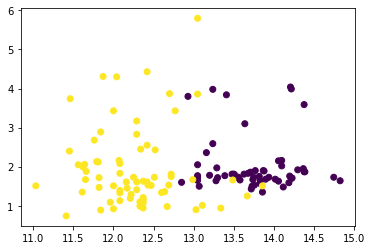

In [2]:
wine = datasets.load_wine()
X = wine.data[:, 0:2]
y = wine.target

X = X[y!=2]
y = y[y!=2]

plt.scatter(X[:, 0], X[:,1],c=y)
plt.show()

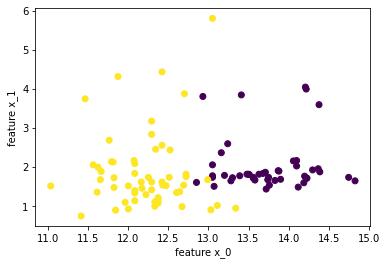

In [3]:
## Separate data into train and test.
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 24)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()

In [4]:
features = ["x_0","x_1"]
labels = str(y)

Load *DecisionTreeClassifier* from *sklearn*.

In [5]:
decision_tree=DecisionTreeClassifier(max_depth=2, random_state=42)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Plot the decision_tree

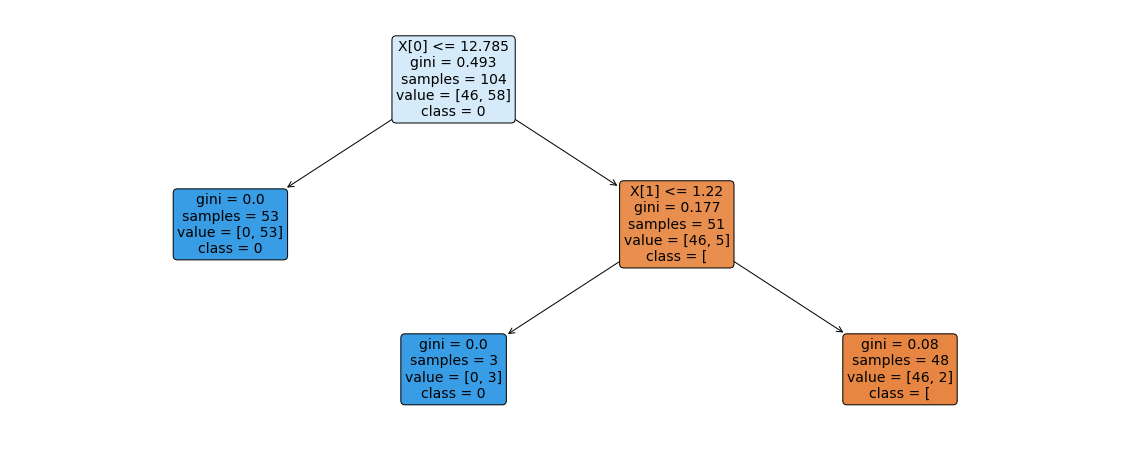

In [6]:
plt.figure(figsize=(20,8))
a = tree.plot_tree(decision_tree,
                  #feature_names = features,
                  class_names = labels,
                  rounded = True,
                  filled = True,
                  fontsize = 14)
plt.show()

Show the result of tree by text.

In [7]:
tree_rules = export_text(decision_tree,
                        feature_names = features)
print(tree_rules)

|--- x_0 <= 12.79
|   |--- class: 1
|--- x_0 >  12.79
|   |--- x_1 <= 1.22
|   |   |--- class: 1
|   |--- x_1 >  1.22
|   |   |--- class: 0



In the following code cell we show the decision boundaries from our trained tree......

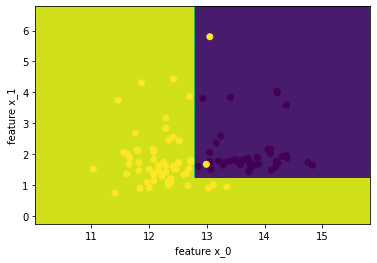

In [8]:
# Set a plot_step
plot_step = 0.02

# Plot the decision boundary
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

xx,yy= np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))

#plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs= plt.contourf(xx,yy,Z)


plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()

----
### The Confusion Matrix <a class="anchor" id="Matrix"></a>

In many instances we are interested in the following:
 * true positieves -> predicted true and actually true
 * false positives -> predicted true and not actually true
 * false negatives -> predicted false but actually true
 * true negnatives -> predicted false and actually false
 
All of these possibilities are contained in the confusion matrix.

----

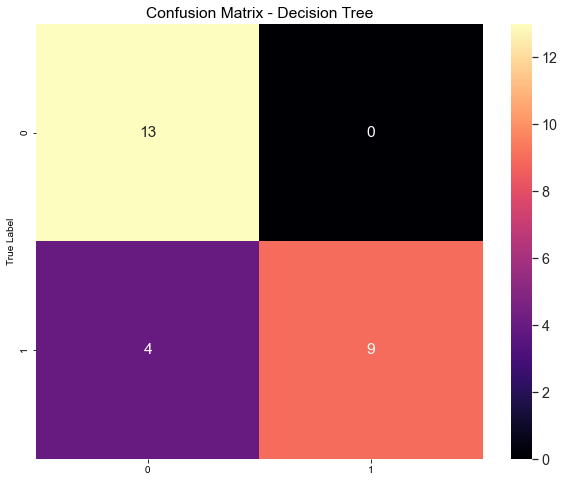

In [9]:
labels = str(y_test)

# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
           annot=True,
           fmt="g",
           ax=ax,
           cmap="magma")

ax.set_title("Confusion Matrix - Decision Tree")
#ax.set_xlabel(labels)
ax.set_ylabel("True Label",fontsize=10)
#ax.set_yticklabels(labels,rotation=0)
plt.show()

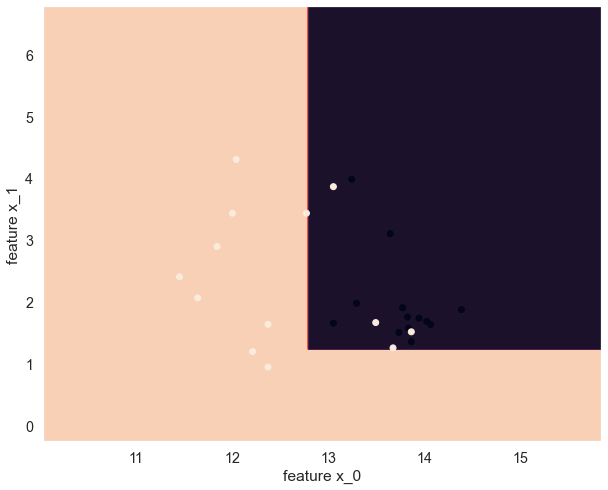

In [10]:
# Set a plot_step with the test data, which is related the confusion_matrix above
## then we can see the meaning of result from confusion_matrix above more easily
plot_step = 0.02

plt.figure(figsize=(10,8))
# Plot the decision boundary
x_min,x_max = X[:,0].min()-1,X[:,0].max()+1
y_min,y_max = X[:,1].min()-1,X[:,1].max()+1

xx,yy= np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))

#plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs= plt.contourf(xx,yy,Z)


plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.xlabel("feature x_0")
plt.ylabel("feature x_1")
plt.show()

Still missclassified some points

--- 
### Accuracy Score <a class="anchor" id="Accuracy"></a>
Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition

$$
\frac {correct}{Total} = \frac {TP+TN}{TP+TN+FP+FN}
$$

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

---

In [11]:
print(f"accuracy score={metrics.accuracy_score(y_test,test_pred_decision_tree)}")

accuracy score=0.8461538461538461


---
### Precision Score <a class="anchor" id="Precision"></a>
Precision tell us how many of the values we predicted to be in a certain class are actually in that class!  

Proportion of positive identifications was actually correct.   Precision = $\frac {TP}{TP+FP}$

---

In [12]:
print(f"precision score")

precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree,
                                   average=None)
precision_results = pd.DataFrame(precision)
precision_results.rename(columns = {0:"precision"},inplace = True)
precision_results

precision score


,precision
0,0.764706
1,1.000000


### Recall <a class="anchor" id="Recall"></a>
Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance. Proportion of actual positives was identified correctly. 
$$
Recall = \frac {TP}{TP+FN}
$$
The F1 score is the harmonic mean of the precision and recall. 
$$
F_1=\frac {2}{recall^{-1}+precision^{-1}}=2*\frac {precision * recall}{precision + recall}=\frac {tp}{tp+\frac {1}{2}(fp+fn)}
$$

In [13]:
# Recall and the f1-score (look them up!)

print(metrics.classification_report(y_test,test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.69      0.82        13

    accuracy                           0.85        26
   macro avg       0.88      0.85      0.84        26
weighted avg       0.88      0.85      0.84        26



---
#### Regression problem <a class="anchor" id="Regression"></a>
---

Decision Trees are also capable of performing regression tasks. The main difference is that instead of predicting a class in each node, it predicts a value. Instead of using Gini index, rgression tree will use mean square error as a metric to decide how to split the next root.

We generate quadratic data plus noise data set.

In [14]:
np.random.seed(24)
m = 200
X = np.random.rand(m, 1)
y = 3 * (X - 0.3) ** 2
noise = np.random.randn(m, 1) / 10
y = y + noise

Text(0.5, 1.0, 'Quadratic + Noise')

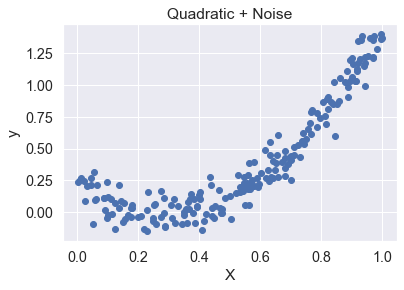

In [15]:
# Visaulize
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.title('Quadratic + Noise')

Split the data into training and test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

Use DecisionTreeRegressor for the regression tree.   

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

### Visualize the tree <a class="anchor" id="Visualize1"></a>
we can see the spliting condition of each node

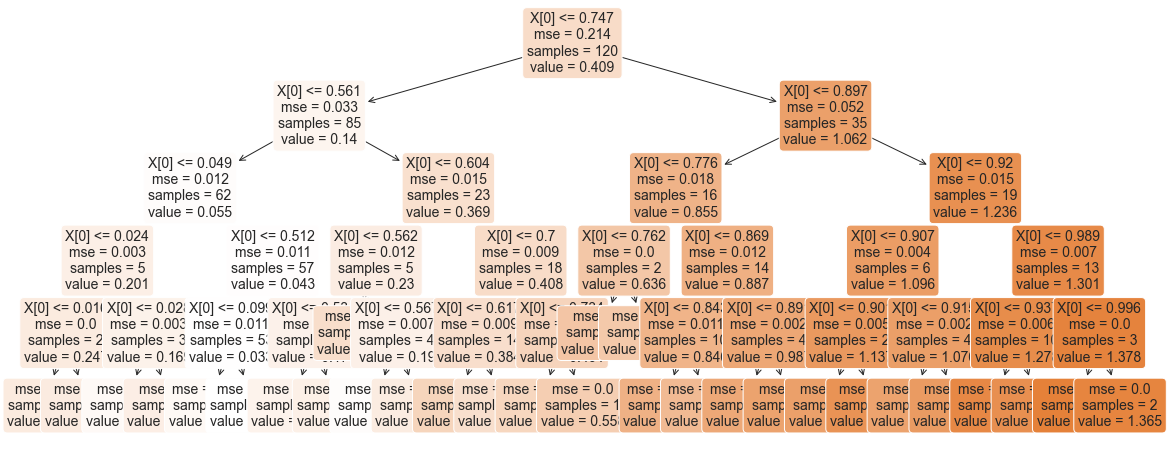

In [18]:
from sklearn import tree

plt.figure(figsize=(20,8))
a = tree.plot_tree(tree_reg,
                   feature_names = None,
                   class_names = None,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()

We can see the MSE keep decreasing when the leaves increase

We again see the spliting rules for each node

In [19]:
pred = tree_reg.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred, squared=False)

0.10851840814864928

Text(0.5, 1.0, 'Prediction (red) vs True (blue)')

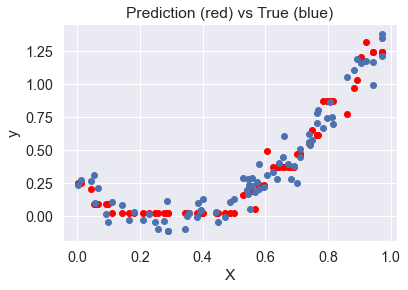

In [21]:
plt.scatter(X_test,pred,c='red')
plt.scatter(X_test,y_test)
plt.xlabel("X")
plt.ylabel("y")
plt.title('Prediction (red) vs True (blue)')

Looks like decision tree is not good on this quadratic data.

### Reference  
1. Wikimedia Foundation. (2021, December 11). Decision tree. Wikipedia. Retrieved December 12, 2021, from https://en.wikipedia.org/wiki/Decision_tree. 
2. Yadav, P. (2019, September 23). Decision tree in machine learning. Medium. Retrieved December 12, 2021, from https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96. 